In [4]:
"""
Deep Learning Theory and Applications, Problem Set 1
"""
# helpful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import (
    NearestNeighbors, # used to identify nearest neighbors, but not to classify
)  


## Problem 1
# 

# Problem 2

**Least Squares Solution:** $w^* = (X^TX)^{-1}X^Ty$

**L2 Norm:** $\|x\|_2 = \left(\sum_{i=1}^{n} |x_i|^2\right)^{1/2}$

In [5]:
def problem2_evaluate_function_on_random_noise(N, sigma):
    """Sample N points uniformly from the interval [-1,3],
    and output the function y = x^2 - 3x + 1 with random noise added to the outputs
    Hint: You can sort x before evaluate the function. This could help plot
    smooth polynomial lines later on

    Parameters
    ----------
    N : int
        The number of points
    sigma : float
        The standard deviation of noise to add to the randomly generated points.

    Returns
    -------
    x, y (list, list)
        x, the randomly generated points
        y, the function evaluated at these points, with added noise
    """
    # uniform N sample over [-1, 3]
    x = np.random.uniform(-1, 3, N)

    x = np.sort(x)

    # evaluate the function y = x^2 - 3x + 1
    # making function parameter-linear for later use in linear regression
    z_1 = x ** 2 
    z_2 = x 
    z_3 = 1

    y = z_1 - 3*z_2 + z_3


    #Gaussian (Normalized) noise
    noise = np.random.normal(loc=0.0, scale=sigma, size=N)

    # Add noise to the function output
    y = y + noise

    return x, y


In [6]:
def problem2_fit_polynomial(x, y, degree, regularization=None):
    """Returns optimal coefficients for a polynomial of the given degree
    to fit the data, using the Moore-Penrose Pseudoinverse (specified in the assignment)
    Note: this function only needs to function for degrees 1,2, and 9 --
    but you are welcome build something that works for any degree.
    By incorporating the value of the regularization parameter, this function should work
    for both 2.2 and 2.3

    Parameters
    ----------
    x : list of floats
        The input x values
    y : list of floats
        The input y values
    degree : int
        The degree of the polynomial to fit
    regularization : float
        The parameter lambda which specifies the degree of regularization to apply. Default 0.

    Returns
    -------
    list of floats
        The coefficients of the polynomial.
    """

    # Create the design matrix for polynomial regression
    X = np.vander(x, N=degree + 1, increasing=True)
    
    # Compute regularized coefficients using the closed-form solution
    # w = (X^T X)^-1 X^T y
    if regularization is None:
        regularization = 0.0
        
    # Add regularization term to the normal equation
    w = np.linalg.inv(X.T @ X + regularization * np.eye(X.shape[1])) @ X.T @ y
    coeffs = w.tolist()

    return coeffs


## Part 1
Write code in Python that randomly generates N points sampled uniformly in the interval $x \in [-1, 3]$. Output the function $y = x^2 - 3x + 1$ for each of the points generated and add zero-mean Gaussian noise with standard deviation $\sigma$ to $y$. Make plots of $x$ and $y$ with $N \in \{15, 100\}$ and $\sigma \in \{0, 0.05, 0.2\}$ (there should be six plots in total). Save the point sets for following questions.

**Hint:** You may want to check the NumPy library for generating noise.


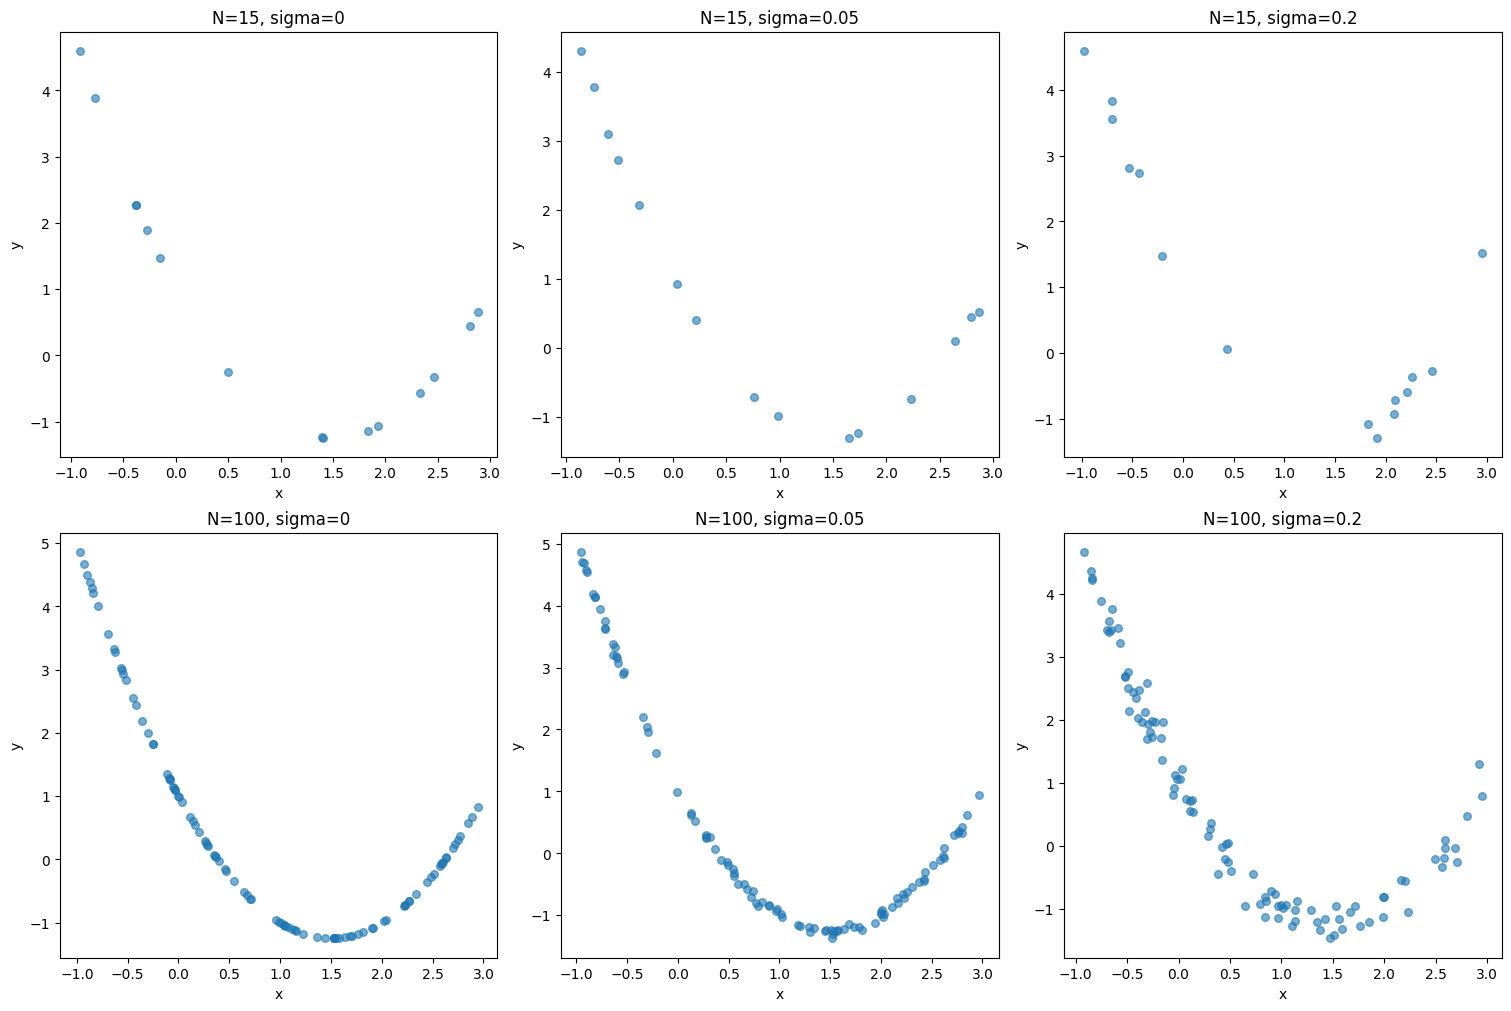

In [7]:
# Generate and save all 6 datasets first
combos = [(15, 0), (15, 0.05), (15, 0.2), (100, 0), (100, 0.05), (100, 0.2)]
datasets = {}

# Saving the point sets
for N, sigma in combos:
    x, y = problem2_evaluate_function_on_random_noise(N, sigma)
    datasets[(N, sigma)] = (x, y)

fig, axes = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)

# Plot the datasets (6 total) in a 2x3 grid of subplots
for idx, (N, sigma) in enumerate(combos):
    # Get the saved dataset
    x, y = datasets[(N, sigma)]
    
    # Get the subplot for this dataset
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Plot the data points
    ax.scatter(x, y, label="Data points", alpha=0.6, s=30)

    ax.set_title(f"N={N}, sigma={sigma}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

# Ensure the figure is displayed in the notebook
plt.show()


## Part 2
Find the optimal weights (in terms of MSE) for fitting a polynomial function to the data in all 6 cases generated above using a polynomial of degree 1, 2, and 9. Use the least squares analytical solution given above. Do not use built-in methods for regression. Plot the fitted curves on the same plot as the data points (you can plot all 3 polynomial curves on the same plot). Report the fitted weights and the MSE in tables. Qualitatively assess the fit of the curves. Does it look like any of the models overfit, underfit, or appropriately fit the data? Explain your reasoning in one or two sentences.

**Hint:** The least squares solution can also be used for polynomial regression. Check slides of lecture 2 for details on L2 norm regularization.

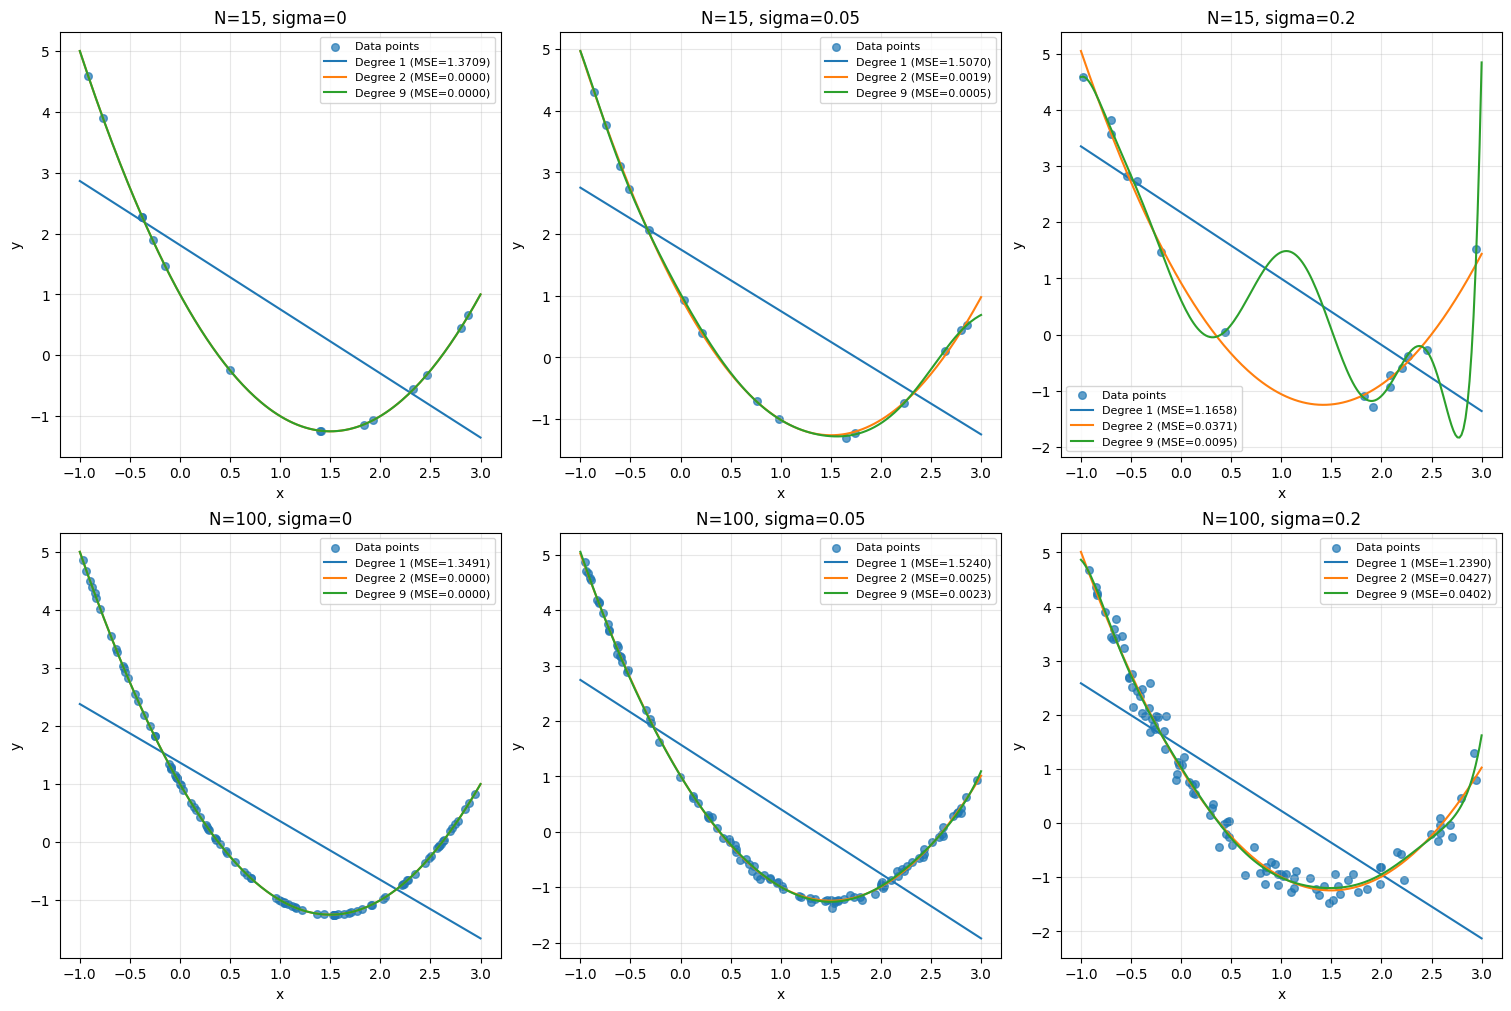

,N,sigma,degree,coefficients,MSE
0,15,0.00,1,"[1.81, -1.054]",1.371
1,15,0.00,2,"[1.0, -3.0, 1.0]",0.000
2,15,0.00,9,"[1.0, -3.0, 1.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0....",0.000
3,15,0.05,1,"[1.752, -1.001]",1.507
4,15,0.05,2,"[0.981, -2.992, 0.997]",0.002
5,15,0.05,9,"[1.03, -2.936, 0.637, 0.025, 0.628, -0.358, -0...",0.001
6,15,0.20,1,"[2.174, -1.177]",1.166
7,15,0.20,2,"[0.919, -3.053, 1.075]",0.037
8,15,0.20,9,"[0.613, -3.862, 4.019, 6.355, -2.183, -6.803, ...",0.010
9,100,0.00,1,"[1.369, -1.009]",1.349


In [8]:
# Part 2
results = []  # to store results for all datasets and degrees

# Define the same ordering used in Part 1 so subplots align
combos = [(15, 0), (15, 0.05), (15, 0.2), (100, 0), (100, 0.05), (100, 0.2)]

# Create a 2x3 grid of subplots (one subplot per dataset)
fig, axes = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)

for idx, (N, sigma) in enumerate(combos):
    x, y = datasets[(N, sigma)]
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Plot the data points
    ax.scatter(x, y, label="Data points", alpha=0.7, s=30)

    # Fit and plot polynomials of degrees 1, 2, and 9 on the same axes
    for degree in [1, 2, 9]:
        coeffs = problem2_fit_polynomial(x, y, degree, regularization=0.0)
        y_pred = np.polyval(coeffs[::-1], x)
        mse = np.mean((y - y_pred) ** 2)

        x_plot = np.linspace(-1, 3, 200)
        y_plot = np.polyval(coeffs[::-1], x_plot)
        ax.plot(x_plot, y_plot, label=f"Degree {degree} (MSE={mse:.4f})")

        results.append({
            'N': N,
            'sigma': sigma,
            'degree': degree,
            'coefficients': coeffs,
            'MSE': mse,
        })

    ax.set_xlabel("x", fontsize=10)
    ax.set_ylabel("y", fontsize=10)
    ax.set_title(f"N={N}, sigma={sigma}", fontsize=12)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Display the 2x3 grid of plots
plt.show()

# Summarize results in a DataFrame
results_df = pd.DataFrame(results)
# Truncate coefficients and MSE to 3 decimal places for display
results_df['coefficients'] = results_df['coefficients'].apply(lambda coeffs: [round(float(c), 3) for c in coeffs])
results_df['MSE'] = results_df['MSE'].round(3)
results_df

### Does it look like any of the models are overfit, underfit, or appropriately fit the data? 

The Linear models (degree=1) are all underfit as the datapoints are not in a linear configuration. The (degree=2) projection seems to be the best fit because it does not intercept all the datapoints whereas the (degree=9) has additional curves to intercept individual points which is a sign of overfitting to the training data.

# Problem 3
1. Load the dataset from file prob3 data seed.dat and normalize the features using min-max scaling so that each feature has the same range of values. (The prob3 data description.txt for the description of the provided dataset.)


In [9]:
df = pd.read_csv('prob3_data_seed.dat', sep=r"\s+", header=None)
X = df.iloc[:, 0:7].astype(float)
y = df.iloc[:, 7].astype(int)

# min-max scaling features (X vals)
X_scaled = (X - X.min()) / (X.max() - X.min())
X_new = X_scaled.values
y_new = y.values


2. Write a program that applies a k-nn classifier to the data with $(k \in {1, 5, 10, 15})$.

- Calculate the test error using both leave-one-out validation and 5-fold cross validation.
- Plot the test error as a function of $(k)$.
- You may use existing methods in \scikit-learn\ or other libraries for finding the k-nearest neighbors, but do not use any built-in k-nn classifiers.
- Any reasonable handling of ties in finding k-nearest neighbors is acceptable.
- Do not use any existing libraries or methods for cross validation.
- Discuss whether any values of $(k)$ result in underfitting or overfitting.


In [10]:
def problem3_knn_classifier(train_data, train_labels, test_data, k):
    """A kth Nearest Neighbor classified. Accepts points and training labels,
    and returns predicted labels for each point in the dataset.

    Parameters
    ----------
    train_data : ndarray
        The training points, in an n x d array, where n is the number of points and d is the dimension.
    train_labels : list of classes
        The training labels. They should correspond directly to the points in the training data array.
    test_data : ndarray
        The unlabelled data, to be labelled by the classifier
    k : positive int
        The number of nearest neighbors to consult.

    Returns
    -------
    predicted_labels : list
        The labels outputted by the classifier for each of the test datapoints.
    """

    # Get Euclidian distance from each test point
    predicted_labels = []
    for data in test_data:
        dist = np.linalg.norm(train_data - data, axis=1)

        # Find k nearest neighors and their labels
        knn_indicies = np.argsort(dist)[:k]
        knn_labels = train_labels[knn_indicies]

        # Get the most common label among the neighbors
        unique_labels, counts = np.unique(knn_labels, return_counts=True)
        most_common_label = unique_labels[np.argmax(counts)]
        predicted_labels.append(most_common_label)


    return predicted_labels

In [11]:
# Leave One Out

predicted_labels = []
k_values = [1, 5, 10, 15]
loo_errors = []

n = len(X_new)

for k in k_values:
    errors = 0
    # Leave-one-out cross-validation
    for i in range(n):
        X_train = np.delete(X_new, i, axis=0)
        y_train = np.delete(y_new, i, axis=0)
        X_test = X_new[i:i+1]

        y_pred = problem3_knn_classifier(X_train, y_train, X_new[i:i+1], k=k)[0]
        if y_pred != y_new[i]:
            errors += 1

        predicted_labels.append(y_pred)

    loo_error_k = errors / n
    loo_errors.append(loo_error_k)
    print(f"Leave-One-Out Error Rate: {loo_error_k:.4f}")



Leave-One-Out Error Rate: 0.0571
Leave-One-Out Error Rate: 0.0714
Leave-One-Out Error Rate: 0.0810
Leave-One-Out Error Rate: 0.0810


In [12]:
# 5-fold Cross Validation

indices = np.arange(len(X_new))
np.random.shuffle(indices)

num_folds = 5
fold_sizes = np.full(num_folds, len(X_new) // num_folds, dtype=int)
fold_sizes[: n % num_folds] += 1  # Distribute remaining samples

current = 0
fold_indicies = []
for fold_size in fold_sizes:
    start, stop = current, current + fold_size
    fold_indicies.append(indices[start:stop])
    current = stop

cv_errors = []

for k in k_values:
    errors = 0  # Reset errors for each k
    
    for fold in fold_indicies:
        X_train = np.delete(X_new, fold, axis=0)
        y_train = np.delete(y_new, fold, axis=0)
        X_test = X_new[fold]
        y_test = y_new[fold]

        y_pred = problem3_knn_classifier(X_train, y_train, X_test, k=k)
        errors += np.sum(y_pred != y_test)

    cv_error_k = errors / len(X_new)
    cv_errors.append(cv_error_k)
    print(f"k={k}: 5-Fold Cross-Validation Error Rate: {cv_error_k:.4f}")

k=1: 5-Fold Cross-Validation Error Rate: 0.0619
k=5: 5-Fold Cross-Validation Error Rate: 0.0667
k=10: 5-Fold Cross-Validation Error Rate: 0.0905
k=15: 5-Fold Cross-Validation Error Rate: 0.0905


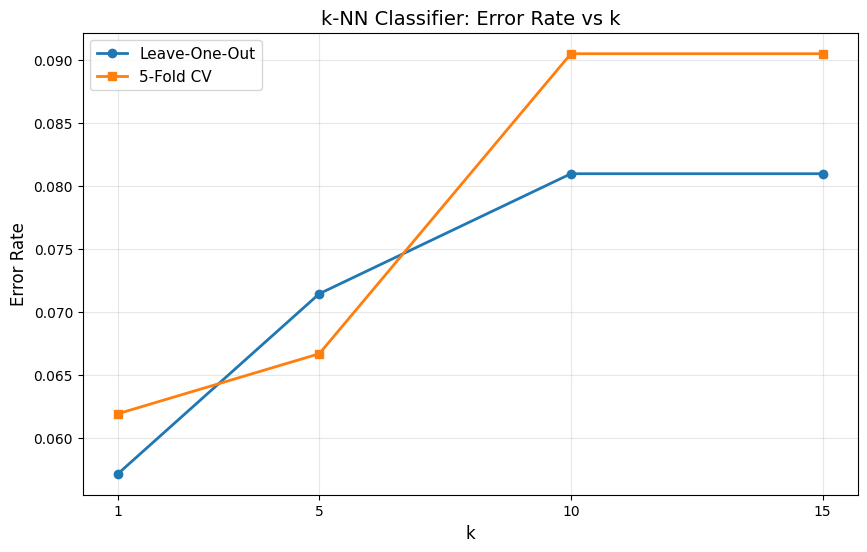


Analysis Summary:
k=1: LOO Error = 0.0571, 5-Fold CV Error = 0.0619
k=5: LOO Error = 0.0714, 5-Fold CV Error = 0.0667
k=10: LOO Error = 0.0810, 5-Fold CV Error = 0.0905
k=15: LOO Error = 0.0810, 5-Fold CV Error = 0.0905


In [13]:
# Plot test error as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, loo_errors, marker='o', label='Leave-One-Out', linewidth=2)
plt.plot(k_values, cv_errors, marker='s', label='5-Fold CV', linewidth=2)
plt.xlabel('k', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('k-NN Classifier: Error Rate vs k', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Summary analysis
print("\nAnalysis Summary:")
print("================")
for i, k in enumerate(k_values):
    print(f"k={k}: LOO Error = {loo_errors[i]:.4f}, 5-Fold CV Error = {cv_errors[i]:.4f}")


- $k=1$ seems to overfit since it have the lowest error rate of $<.06$ for both cross validation techniques
-  $k=5, 10$ comparatively average errors but veering to the higher side which makes me want to classifying it closer to and underfit
- $k=15$ is comparatively an underfit

## Part 3: Additional Classifiers

Apply two other classifiers (SVM and Logistic Regression) to the same data using 5-fold cross validation. Test multiple tuning parameters and report training and test errors for each.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Re-create fold indices for consistent comparison
indices = np.arange(len(X_new))
np.random.shuffle(indices)

num_folds = 5
fold_sizes = np.full(num_folds, len(X_new) // num_folds, dtype=int)
fold_sizes[: len(X_new) % num_folds] += 1

current = 0
fold_indicies = []
for fold_size in fold_sizes:
    start, stop = current, current + fold_size
    fold_indicies.append(indices[start:stop])
    current = stop

# LOGISTIC REGRESSION 
print("=" * 60)
print("LOGISTIC REGRESSION - Tuning Parameter C (Inverse Regularization)")
print("=" * 60)

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
lr_results = []

for C in C_values:
    train_errors = []
    test_errors = []
    
    for fold in fold_indicies:
        X_train = X_new[~np.isin(np.arange(len(X_new)), fold)]
        y_train = y_new[~np.isin(np.arange(len(X_new)), fold)]
        X_test = X_new[fold]
        y_test = y_new[fold]
        
        # Train Logistic Regression
        lr = LogisticRegression(C=C, max_iter=1000, random_state=42)
        lr.fit(X_train, y_train)
        
        # Calculate errors
        train_pred = lr.predict(X_train)
        test_pred = lr.predict(X_test)
        train_error = np.sum(train_pred != y_train) / len(y_train)
        test_error = np.sum(test_pred != y_test) / len(y_test)
        
        train_errors.append(train_error)
        test_errors.append(test_error)
    
    avg_train_error = np.mean(train_errors)
    avg_test_error = np.mean(test_errors)
    
    lr_results.append({
        'C': C,
        'Avg Train Error': avg_train_error,
        'Avg Test Error': avg_test_error
    })
    
    print(f"C={C:>7}: Train Error = {avg_train_error:.4f}, Test Error = {avg_test_error:.4f}")

print()

NameError: name 'X_new' is not defined

In [1]:
# ===== SUPPORT VECTOR MACHINE (SVM) =====
print("=" * 70)
print("SUPPORT VECTOR MACHINE - Tuning Parameters C and Kernel")
print("=" * 70)

C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'rbf']
svm_results = []

for kernel in kernels:
    print(f"\nKernel: {kernel.upper()}")
    print("-" * 70)
    
    for C in C_values:
        train_errors = []
        test_errors = []
        
        for fold in fold_indicies:
            X_train = X_new[~np.isin(np.arange(len(X_new)), fold)]
            y_train = y_new[~np.isin(np.arange(len(X_new)), fold)]
            X_test = X_new[fold]
            y_test = y_new[fold]
            
            # Train SVM
            svm = SVC(C=C, kernel=kernel, random_state=42)
            svm.fit(X_train, y_train)
            
            # Calculate errors
            train_pred = svm.predict(X_train)
            test_pred = svm.predict(X_test)
            train_error = np.sum(train_pred != y_train) / len(y_train)
            test_error = np.sum(test_pred != y_test) / len(y_test)
            
            train_errors.append(train_error)
            test_errors.append(test_error)
        
        avg_train_error = np.mean(train_errors)
        avg_test_error = np.mean(test_errors)
        
        svm_results.append({
            'Kernel': kernel,
            'C': C,
            'Avg Train Error': avg_train_error,
            'Avg Test Error': avg_test_error
        })
        
        print(f"  C={C:>5}: Train Error = {avg_train_error:.4f}, Test Error = {avg_test_error:.4f}")

print("\n")


SUPPORT VECTOR MACHINE - Tuning Parameters C and Kernel

Kernel: LINEAR
----------------------------------------------------------------------


NameError: name 'fold_indicies' is not defined

In [16]:
# Create summary DataFrames
lr_df = pd.DataFrame(lr_results)
svm_df = pd.DataFrame(svm_results)

print("LOGISTIC REGRESSION RESULTS")
print("=" * 60)
print(lr_df.to_string(index=False))
print()

print("SVM RESULTS")
print("=" * 70)
print(svm_df.to_string(index=False))
print()

# Comparison Plot: Logistic Regression
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LR plot
ax1 = axes[0]
ax1.plot(range(len(C_values)), [r['Avg Train Error'] for r in lr_results], 
         marker='o', label='Train Error', linewidth=2)
ax1.plot(range(len(C_values)), [r['Avg Test Error'] for r in lr_results], 
         marker='s', label='Test Error', linewidth=2)
ax1.set_xticks(range(len(C_values)))
ax1.set_xticklabels([f'{c}' for c in C_values])
ax1.set_xlabel('C (Inverse Regularization)', fontsize=11)
ax1.set_ylabel('Error Rate', fontsize=11)
ax1.set_title('Logistic Regression: Train vs Test Error', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# SVM plot
ax2 = axes[1]
for kernel in kernels:
    kernel_results = [r for r in svm_results if r['Kernel'] == kernel]
    C_vals = [r['C'] for r in kernel_results]
    test_errs = [r['Avg Test Error'] for r in kernel_results]
    ax2.plot(range(len(C_vals)), test_errs, marker='o', label=f'{kernel.upper()} kernel', linewidth=2)

ax2.set_xticks(range(len(C_values)))
ax2.set_xticklabels([f'{c}' for c in C_values])
ax2.set_xlabel('C (Regularization Parameter)', fontsize=11)
ax2.set_ylabel('Test Error Rate', fontsize=11)
ax2.set_title('SVM: Test Error by Kernel and C', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("COMPARISON: Best Parameters")
print("=" * 60)
best_lr = lr_df.loc[lr_df['Avg Test Error'].idxmin()]
print(f"Logistic Regression: C={best_lr['C']}, Test Error = {best_lr['Avg Test Error']:.4f}")

best_svm = svm_df.loc[svm_df['Avg Test Error'].idxmin()]
print(f"SVM ({best_svm['Kernel']}): C={best_svm['C']}, Test Error = {best_svm['Avg Test Error']:.4f}")

print(f"\nBest k-NN (k=5): Test Error = {cv_errors[1]:.4f}")


NameError: name 'svm_results' is not defined

# Problem 3
1. Suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive constant, $c > 0$. Show that the behavior of the network doesn’t change. (Exercise in Ch1 Nielsen book)

A. Let $y$ be the weighted sum of inputs $x_1, ..., x_{n-1}, x_n$
$weights: w_0, w_1, ..., w_n$ ($w_0$ is bias)
$w_0 + x_1 w_1 + ... + x_n w_n = y$
Therefore, $c(w_0 + x_1 w_1 + x_n w_n) =< cy$

Case 1: $y > 0$ : $y > 0$ since $c < 0$

Case 2: $y <= 0$ : $y <= 0$ 

This will apply to any other layer through induction since no previous activations change

B. Let work with the same summation $y$ and the sigmoid function $sigma = \frac{1}{1+e^-c}$

Case 1: $y>0$ since $\lim_{c \to \infty} cy = \infty$, therefore $\lim_{c \to \infty} \frac{1}{1+e^{-cy}} = 1$

Case 2: $y<0$ since $\lim_{c \to -\infty} cy = -\infty$, therefore $\lim_{c \to -\infty} \frac{1}{1+e^{-cy}} = 0$

For both of these cases we get valid perceptron outputs via the sigmoid. But if the perceptron output = 0, we would get a value of $\frac{1}{1+e^{-cy}} = \frac{1}{2}$, leading to a difference.

